# Repaso - Módulo 2
---

In [31]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import yfinance as yf

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_3$"
- El mensaje que llegó fue: "12, 19, 15, 24"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [1]:
def montecarlo1(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [13]:
def f1(x):
    return np.sqrt(1+x**4)
def f2(x):
    return np.log(np.log(x))
def f3(x):
    return 1/np.log(x)
def f4(x):
    return np.exp(-(x**2)/2)

def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

a = 4
b = 5
N = np.logspace(1, 5, 5)


table = pd.DataFrame(columns = ["Aproximación1", "Error1","Aproximación2","Error2","Aproximación3","Error3","Aproximación4","Error4"], index=N)
for i in N:
    proximación1 = montecarlo(f1, int(i), a, b)
    proximación2 = montecarlo(f2, int(i), a, b)
    proximación3 = montecarlo(f3, int(i), a, b)
    proximación4 = montecarlo(f4, int(i), a, b)
    table.loc[i, "Aproximación1"] = proximación1
    table.loc[i, "Aproximación2"] = proximación2
    table.loc[i, "Aproximación3"] = proximación3
    table.loc[i, "Aproximación4"] = proximación4
    table.loc[i, "Error1"] = abs(20.3583 -  proximación1)
    table.loc[i, "Error2"] = abs(0.405885 - proximación2)
    table.loc[i, "Error3"] = abs(0.667003 - proximación3)
    table.loc[i, "Error4"] = abs(0.00756977 - proximación4)
table

,Aproximación1,Error1,Aproximación2,Error2,Aproximación3,Error3,Aproximación4,Error4
10.0,20.546608,0.188308,0.388601,0.017284,0.676314,0.009311,0.000061,0.007509
100.0,19.942153,0.416147,0.412626,0.006741,0.668193,0.00119,0.000078,0.007492
1000.0,20.358231,0.000069,0.404968,0.000917,0.667325,0.000322,0.000077,0.007493
10000.0,20.315383,0.042917,0.405482,0.000403,0.667348,0.000345,0.00008,0.00749
100000.0,20.362481,0.004181,0.405927,0.000042,0.667026,0.000023,0.000079,0.007491


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

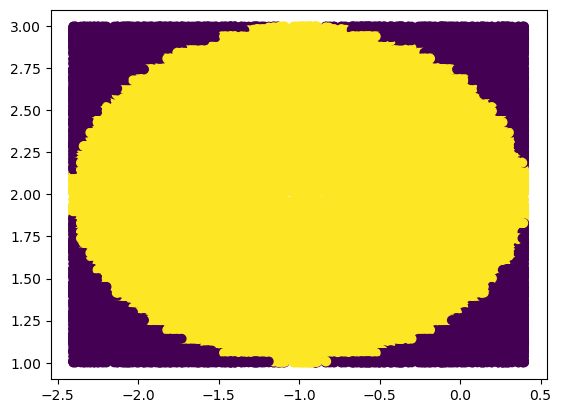

In [17]:
def bernoulli(x,y):
    return x**2+2*y**2 <= -2*x+8*y-7

x = np.random.uniform(-2.41, 0.41, 300)
y = np.random.uniform(1, 3, 300)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=bernoulli(X, Y))

In [20]:
def montecarlo2(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x,y)
    AR = (xb-xa)*(yb-ya)
    return np.mean(B)*AR

table2 = pd.DataFrame(columns = ["Aproximación", "Error"], index=N)

for i in N:
    ap2 = montecarlo2(bernoulli, -2.41, 0.41, 1, 3, int(i))
    table2.loc[i, "Aproximación"] = ap2
    AD = (0.41-(-2.41)*(3-1))
    C = (((1-(ap2/AD))/(ap2/AD)))**1/2
    table2.loc[i, "Error"] = np.log10(C)-(1/2)*np.log10(i)
table2

,Aproximación,Error
10.0,3.948,-1.289519
100.0,4.3428,-1.990778
1000.0,4.4556,-2.560971
10000.0,4.417248,-3.036224
100000.0,4.451426,-3.55823


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [24]:
import pandas as pd
import numpy as np

In [25]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [29]:
T0 = np.array([
    [0.50, 0.00],
    [0.00, 0.50]
])

D0 = np.array([1.00, 1.00])

T1 = np.array([
    [0.50, 0.00],
    [0.00, 0.50]
])

D1 = np.array([50.00, 1.00])

T2 = np.array([
    [0.50, 0.00],
    [0.00, 0.50]
])

D2 = np.array([1.00, 50.00])

T3 = np.array([
    [0.50, 0.00],
    [0.00, 0.50]
])

D3 = np.array([50.00, 50.00])

x = [np.array([0, 0])]

T = [T0, T1, T2, T3]
D = [D0, D1, D2, D3]

for k in range(100000):
    i = random.choices([0, 1, 2, 3], weights = df["$p_i$"])[0]
    xkm1 = T[1] @ x[-1] + D[i]
    x.append(xkm1)

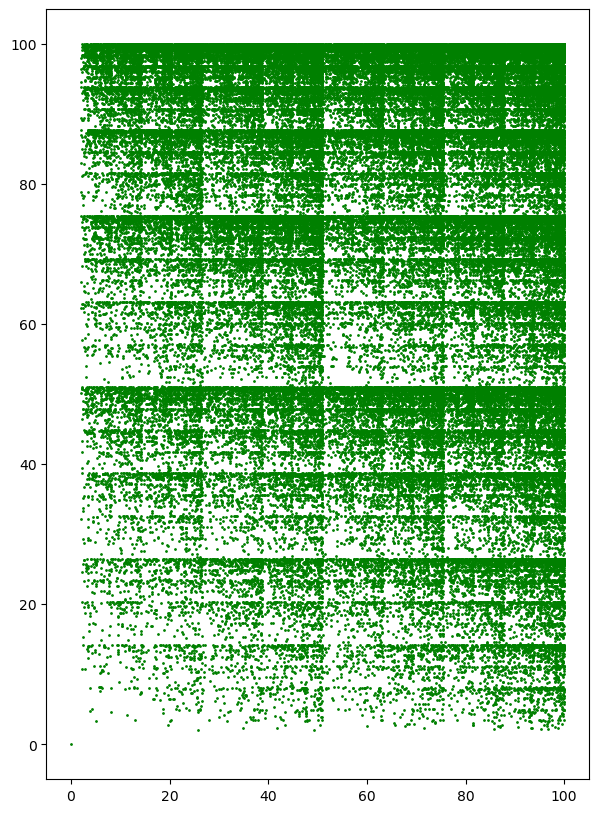

In [30]:
resultado = np.array(x)
plt.figure(figsize=(7, 10))
plt.scatter(resultado[:, 0], resultado[:, 1], s=1, c="g")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [32]:
def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]
data = getClose(["AAPL", "MSFT"], "2015-01-01", "2019-12-30")

[*********************100%%**********************]  2 of 2 completed


Calcule los rendimientos diarios junto con sus características estadísticas

In [39]:
R = (data-data.shift())/data.shift()

In [34]:
data.describe()

,AAPL,MSFT
count,1256.000000,1256.000000
mean,36.391744,75.492546
std,11.150730,31.936562
min,20.826057,35.021553
25%,26.415202,47.793405
50%,35.526382,65.504425
75%,44.460692,100.890144
max,70.702919,153.490814


Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [48]:
def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size = (dias, N))
    fechas = pd.date_range(start = fecha_inicio, periods = dias)
    return pd.DataFrame(index=fechas, data=R_sim)

simA = sim_R(R["AAPL"].mean(), R["AAPL"].std(), "2020-01-01", 365, 1000)
simA

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,-0.009790,-0.016751,-0.010272,-0.000744,-0.010742,-0.046522,-0.014917,0.001724,0.001277,0.003670,...,-0.039169,0.007403,0.001621,-0.007463,-0.006166,0.023138,0.005093,-0.000709,-0.001407,-0.004914
2020-01-02,0.005469,0.007435,0.010232,-0.004598,0.030224,-0.008485,0.009716,-0.007385,-0.001057,0.003420,...,-0.002144,0.006227,0.010742,0.009063,-0.028532,0.001720,-0.023795,0.022488,-0.019301,0.014926
2020-01-03,-0.001363,-0.010132,0.002808,-0.012019,-0.000642,-0.005706,-0.003696,0.010391,-0.009775,-0.025001,...,-0.014986,0.010969,-0.010973,-0.005066,-0.013363,-0.001166,0.003006,0.003555,-0.008722,-0.003283
2020-01-04,0.004960,-0.010805,0.011586,0.002876,0.004725,0.015116,0.000651,0.014086,-0.004984,-0.005481,...,0.015158,-0.020201,0.004719,0.003358,0.009614,-0.022614,0.030167,-0.013174,-0.013540,-0.004093
2020-01-05,-0.023680,-0.012298,0.002000,0.000038,-0.011577,0.000589,0.008039,0.004483,0.007218,0.006078,...,-0.012822,0.001225,-0.006446,0.010253,0.008932,0.030692,-0.001277,0.017353,-0.023022,-0.021571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,0.037909,0.012590,0.015028,0.002398,-0.026860,-0.002953,-0.002883,-0.016479,0.006551,-0.025769,...,-0.008212,0.008609,0.016727,0.009886,-0.022099,0.003582,-0.000247,0.003291,-0.022548,-0.021869
2020-12-27,0.018155,0.003769,-0.006234,0.004107,0.017116,0.016904,0.007985,0.010104,-0.005383,-0.015751,...,-0.022950,0.001326,-0.013683,-0.002549,0.003823,0.011551,0.013789,-0.013002,0.018240,0.019191
2020-12-28,0.005677,0.022488,-0.002383,-0.006652,0.012450,-0.004132,0.023025,0.003428,0.019728,0.027921,...,0.018286,-0.003409,-0.013358,0.008111,-0.011509,-0.013304,-0.000191,0.019074,-0.002825,0.006983
2020-12-29,-0.002568,0.006658,0.001461,0.002128,-0.007644,0.017328,0.000354,-0.011770,0.004987,0.006310,...,0.000924,-0.017097,-0.012787,0.024341,0.041932,0.031764,-0.024269,-0.029269,0.004305,-0.010214


In [49]:
simM = sim_R(R["MSFT"].mean(), R["MSFT"].std(), "2020-01-01", 365, 1000)
simM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,0.006875,-0.002209,0.009458,0.000291,0.017216,0.009723,-0.037675,-0.006090,0.010367,-0.025903,...,0.020902,0.018835,0.014555,-0.017285,0.000469,0.027915,-0.038461,0.011775,0.007587,-0.026713
2020-01-02,-0.001651,0.007590,0.003873,-0.024088,-0.001560,-0.010230,-0.008267,0.022433,0.000279,-0.001660,...,-0.024231,0.005969,-0.020665,0.004780,0.021614,0.027600,0.000847,-0.015993,-0.006753,-0.017291
2020-01-03,-0.010709,0.003836,0.003493,-0.006900,-0.007986,-0.026005,-0.024057,-0.019411,0.018958,0.014591,...,-0.005563,0.057497,0.012061,-0.014060,-0.031823,0.021253,-0.001705,0.007219,-0.008570,-0.003310
2020-01-04,-0.005483,0.017354,0.017208,-0.012824,0.003056,0.002450,0.003178,-0.005075,0.012779,0.018398,...,-0.034449,-0.002333,0.002674,0.015415,-0.010535,-0.000585,0.019395,0.006045,-0.021201,0.003522
2020-01-05,0.026316,-0.009647,0.008281,-0.033168,0.000450,0.003937,0.002921,-0.010577,0.004916,0.019739,...,-0.006330,0.003126,-0.000973,0.002038,0.010116,0.019122,0.016625,0.004179,0.015924,-0.003014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,-0.011974,0.010720,0.032049,-0.022020,-0.004285,-0.006582,0.023050,0.026989,0.002929,0.004598,...,-0.001363,0.001852,-0.000403,0.011590,-0.012360,0.018597,-0.009444,-0.004164,0.003376,0.002203
2020-12-27,0.017540,0.013228,0.001335,-0.009570,0.020136,0.010108,-0.010115,0.009280,-0.009103,-0.009602,...,0.001550,0.013248,0.003576,-0.012595,0.007233,0.008761,-0.018315,0.009762,0.010646,0.025455
2020-12-28,-0.005873,-0.011520,0.014115,0.017649,-0.000194,0.021957,-0.008824,0.005995,0.001182,0.004881,...,0.022733,0.007670,-0.006809,-0.010547,0.012844,0.014077,0.015562,-0.016004,0.037220,0.009329
2020-12-29,-0.018607,0.028818,-0.015393,0.005602,-0.017905,-0.019239,-0.010509,-0.010665,-0.028879,0.001837,...,-0.011285,-0.001508,-0.012687,0.000064,0.003815,-0.018875,0.009801,0.014042,-0.014729,0.012966


Calcule los precios con base en los rendimientos simulados

In [50]:
precios_simuladosA = (1 + simA).cumprod()*data["AAPL"][-1]
precios_simuladosA

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,69.984191,69.492173,69.950096,70.623512,69.916896,67.388102,69.621788,70.797947,70.766373,70.935458,...,67.907755,71.199285,70.790689,70.148629,70.240311,72.311428,71.036038,70.626012,70.576621,70.328768
2020-01-02,70.366937,70.008865,70.665854,70.298777,72.030056,66.816334,70.298215,70.275070,70.691580,71.178025,...,67.762152,71.642659,71.551131,70.784362,68.236223,72.435780,69.345758,72.214223,69.214409,71.378490
2020-01-03,70.271038,69.299511,70.864307,69.453882,71.983781,66.435104,70.038416,71.005294,70.000549,69.398497,...,66.746669,72.428539,70.765974,70.425736,67.324351,72.351292,69.554235,72.470931,68.610747,71.144176
2020-01-04,70.619573,68.550700,71.685334,69.653655,72.323908,67.439320,70.084030,72.005509,69.651665,69.018152,...,67.758416,70.965389,71.099927,70.662231,67.971619,70.715121,71.652450,71.516163,67.681786,70.852967
2020-01-05,68.947320,67.707690,71.828712,69.656307,71.486647,67.479060,70.647439,72.328335,70.154387,69.437659,...,66.889595,71.052342,70.641603,71.386764,68.578737,72.885529,71.560950,72.757203,66.123632,69.324630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,85.255416,70.250976,82.262726,67.038537,66.156540,99.485007,81.706234,75.018396,137.940659,58.868642,...,50.870678,95.027851,98.196955,80.950949,71.814778,143.779212,138.358798,99.805299,114.675984,94.490210
2020-12-27,86.803223,70.515749,81.749879,67.313831,67.288903,101.166659,82.358619,75.776374,137.198115,57.941393,...,49.703185,95.153903,96.853302,80.744620,72.089331,145.440005,140.266641,98.507606,116.767671,96.303536
2020-12-28,87.296028,72.101490,81.555042,66.866047,68.126632,100.748628,84.254943,76.036148,139.904814,59.559191,...,50.612035,94.829569,95.559556,81.399506,71.259630,143.505095,140.239787,100.386535,116.437835,96.976048
2020-12-29,87.071822,72.581575,81.674206,67.008327,67.605861,102.494436,84.284751,75.141191,140.602561,59.935038,...,50.658789,93.208287,94.337645,83.380811,74.247704,148.063367,136.836321,97.448320,116.939096,95.985496


In [51]:
precios_simuladosM = (1 + simM).cumprod()*data["MSFT"][-1]
precios_simuladosM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,154.546086,153.151741,154.942469,153.535419,156.133383,154.983200,147.708025,152.556084,155.082017,149.514903,...,156.699116,156.381742,155.724814,150.837719,153.562756,157.775443,147.587466,155.298096,154.655315,149.390626
2020-01-02,154.290868,154.314140,155.542531,149.837001,155.889831,153.397728,146.486939,155.978393,155.125219,149.266672,...,152.902137,157.315240,152.506778,151.558749,156.881828,162.130103,147.712487,152.814342,153.610945,146.807584
2020-01-03,152.638629,154.906062,156.085878,148.803172,154.644848,149.408587,142.962831,152.950758,158.066159,151.444692,...,152.051537,166.360340,154.346136,149.427764,151.889431,165.575856,147.460573,153.917467,152.294482,146.321654
2020-01-04,151.801773,157.594373,158.771797,146.894938,155.117381,149.774630,143.417227,152.174604,160.086045,154.230987,...,146.813559,165.972165,154.758782,151.731214,150.289308,165.478963,150.320534,154.847822,149.065704,146.836936
2020-01-05,155.796619,156.074085,160.086665,142.022794,155.187177,150.364262,143.836186,150.565042,160.873063,157.275426,...,145.884159,166.491044,154.608148,152.040402,151.809700,168.643299,152.819575,155.494885,151.439438,146.394375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,332.370509,175.457612,225.457798,264.002600,538.012442,267.976322,251.437119,187.112397,179.431504,192.156633,...,225.323321,306.479812,294.402916,259.597567,147.571133,226.953771,152.479687,212.890542,188.288774,198.963698
2020-12-27,338.200263,177.778627,225.758782,261.476056,548.845961,270.684919,248.893852,188.848828,177.798166,190.311501,...,225.672571,310.540048,295.455847,256.327976,148.638470,228.942118,149.687041,214.968713,190.293372,204.028363
2020-12-28,336.214002,175.730686,228.945301,266.090931,548.739687,276.628417,246.697645,189.981041,178.008322,191.240387,...,230.802717,312.922045,293.444116,253.624530,150.547578,232.164850,152.016469,211.528332,197.376117,205.931832
2020-12-29,329.957975,180.794919,225.421064,267.581541,538.914405,271.306254,244.104994,187.954983,172.867552,191.591630,...,228.198165,312.450309,289.721296,253.640672,151.121935,227.782735,153.506426,214.498591,194.468941,208.601988


Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [55]:
valor_deseadoA = data["AAPL"][-1]*1.02
data["AAPL"][-1], valor_deseadoA

(70.67609405517578, 72.0896159362793)

In [56]:
sobrepasaA = valor_deseadoA <= precios_simuladosA
sobrepasaA

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2020-01-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2020-01-03,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2020-01-04,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-05,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,True,False,True,False,False,True,True,True,True,False,...,False,True,True,True,False,True,True,True,True,True
2020-12-27,True,False,True,False,False,True,True,True,True,False,...,False,True,True,True,False,True,True,True,True,True
2020-12-28,True,True,True,False,False,True,True,True,True,False,...,False,True,True,True,False,True,True,True,True,True
2020-12-29,True,True,True,False,False,True,True,True,True,False,...,False,True,True,True,True,True,True,True,True,True


In [57]:
valor_deseadoM = data["MSFT"][-1]*1.02
data["MSFT"][-1], valor_deseadoM

(153.49081420898438, 156.56063049316407)

In [58]:
sobrepasaM = valor_deseadoM <= precios_simuladosM
sobrepasaM

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2020-01-02,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
2020-01-03,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
2020-01-04,False,True,True,False,False,False,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
2020-01-05,False,False,True,False,False,False,False,False,True,True,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,False,True,True,True
2020-12-27,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,False,True,True,True
2020-12-28,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,False,True,True,True
2020-12-29,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,False,True,True,True


Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

In [59]:
def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]
datta = getClose(["AAPL", "MSFT"], "2020-01-01", "2020-12-30")

[*********************100%%**********************]  2 of 2 completed


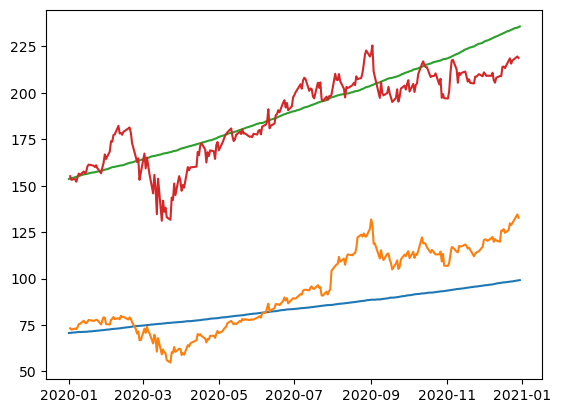

In [62]:
plt.figure()
plt.plot(precios_simuladosA.mean(axis=1))
plt.plot(datta["AAPL"])
plt.plot(precios_simuladosM.mean(axis=1))
plt.plot(datta["MSFT"])

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?